# **Buisness Objective**

Summarization has been and continues to be a hot research topic in the data science arena. While text summarization algorithms have existed for a while, major advances in natural language processing and deep learning have been made in recent years. Many internet companies are actively publishing research papers on the subject. Salesforce has published various groundbreaking papers presenting state-of-the-art abstractive summarization. In May 2018, the largest summarization dataset as revealed in a projected supported by a Google Research award.



While there is intense activity in the research field, there is less literature available regarding real world applications of AI-driven summarization. One of the challenges with summarization is that it is hard to generalize. For example, summarizing a news article is very different to summarizing a financial earnings report. Certain text features like document length or genre (tech, sports, finance, travel, etc.) make the task of summarization a serious data science problem to solve.  For this reason, the way summarization works largely depends on the use case and there is no one-size-fits-all solution.

Source - https://paperswithcode.com/sota/abstractive-text-summarization-on-cnn-daily

# **BART Summarization Pre-Training Data Description: CNN/ DM**




The CNN/DailyMail (Hermann et al., 2015) dataset contains 93k articles from the CNN, and 220k articles the Daily Mail newspapers. Both publishers supplement their articles with bullet point summaries. Non-anonymized variant in See et al. (2017).


Download and unzip the stories directories from here for both CNN and Daily Mail. The files can be downloaded from the terminal with gdown, which can be installed with pip install gdown.

In [ ]:
!pip install datasets

from datasets import load_dataset, list_datasets

datasets = list_datasets()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 365 kB 5.0 MB/s 
     |████████████████████████████████| 120 kB 66.5 MB/s 
     |████████████████████████████████| 212 kB 57.1 MB/s 
     |████████████████████████████████| 115 kB 60.2 MB/s 
     |████████████████████████████████| 127 kB 65.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


Permalink: https://huggingface.co/datasets/viewer/?dataset=cnn_dailymail&config=3.0.0



In [ ]:
from pprint import pprint

print(f"🤩 Currently {len(datasets)} datasets are available on the hub:")
pprint(datasets, compact=True)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
 'anuragshas/pa_cc100_processed', 'anuragshas/sk_opus100_processed',
 'anuragshas/sl_opus100_processed', 'anuragshas/ur_opus100_processed',
 'anushakamath/sv_corpora_parliament_processed_v0', 'anzorq/kbd-ru-1.67M-temp',
 'anzorq/kbd-ru-jsonl-tmp', 'anzorq/kbd-ru-temp', 'arch-raven/MAMI',
 'arjunth2001/online_privacy_qna', 'artemis13fowl/github-issues',
 'artyeth/Dorian', 'aryanpatke/github-issues', 'lmqg/qg_jaquad',
 'lmqg/qg_squad', 'aseifert/merlin', 'aseifert/pie-synthetic',
 'ashraq/dhivehi-corpus', 'asi/wikitext_fr', 'asoroa/bsbasque',
 'astarostap/antisemitic-tweets', 'astarostap/antisemitic_tweets',
 'astarostap/autonlp-data-antisemitism-2', 'astremo/friendly_JA_corpus',
 'astrideducation/cefr-combined-no-cefr-test', 'atelders/politweets',
 'athar/QA', 'athar/a_b', 'ausgequetschtem/jtrddfhfgh',
 'austin/rheum_abstracts', 'avadesian/dddd', 'avanishcobaltest/datasetavanish',
 'averyanalex/panorama', 'azu

In [ ]:
dataset_ = load_dataset('cnn_dailymail', '3.0.0', split='train[:15]')

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

Dataset cnn_dailymail downloaded and prepared to /root/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/1b3c71476f6d152c31c1730e83ccb08bcf23e348233f4fcc11e182248e6bf7de. Subsequent calls will reuse this data.


In [ ]:
print(dataset_)

Dataset({
    features: ['article', 'highlights', 'id'],
    num_rows: 15
})


In [ ]:
print(f"👉Dataset len(dataset): {len(dataset_)}")
print("\n👉First item 'dataset[0]':")
pprint(dataset_[0])

👉Dataset len(dataset): 15

👉First item 'dataset[0]':
{'article': 'LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe '
            'gains access to a reported £20 million ($41.1 million) fortune as '
            "he turns 18 on Monday, but he insists the money won't cast a "
            'spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter '
            'and the Order of the Phoenix" To the disappointment of gossip '
            'columnists around the world, the young actor says he has no plans '
            'to fritter his cash away on fast cars, drink and celebrity '
            'parties. "I don\'t plan to be one of those people who, as soon as '
            'they turn 18, suddenly buy themselves a massive sports car '
            'collection or something similar," he told an Australian '
            'interviewer earlier this month. "I don\'t think I\'ll be '
            'particularly extravagant. "The things I like buying are things '
            'that cost a

### **BART Fine-Tuning: Using Transformers**

In [1]:
!pip install transformers
!pip install pytorch_lightning==1.5.10

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 31.5 MB/s 
     |████████████████████████████████| 6.6 MB 56.0 MB/s 
     |████████████████████████████████| 120 kB 71.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 527 kB 12.1 MB/s 
     |████████████████████████████████| 419 kB 55.4 MB/s 
     |████████████████████████████████| 829 kB 50.7 MB/s 
     |████████████████████████████████| 952 kB 50.6 MB/s 
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=965f49322e6d9a1501cc2b2af32eceb6d87c23154378359a7559202bb4edd899
  Stored in directory: /root/.cache/pip/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
Successfully built future
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptoo

In [2]:
import torch
from torch.nn import functional as F
from torch import nn
import pytorch_lightning as pl
# https://www.pytorchlightning.ai/

from transformers import BartForConditionalGeneration, BartTokenizer
from sklearn.model_selection import train_test_split
import pandas as pd

from transformers import (
    AdamW,
    get_linear_schedule_with_warmup
)
from torch.utils.data import DataLoader

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

In [ ]:
# Checking out the GPU we have access to. This is output is from the google colab version. 
!nvidia-smi

Wed Sep 21 09:30:20 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

For this project, we will use pytorch lighning
Suppose you're an artificial intelligence (AI) researcher or machine learning (ML) developer looking for maximum flexibility while supercharging performance at scale. In that case, PyTorch Lightning is the deep learning framework for you. 

We will be defining three classes and we will be inheriting pl.LightningModule from Lightning



The following code display the Dataset class.
torch.utils.data.Dataset is an abstract class representing a dataset. Your custom dataset should inherit Dataset and override the following methods:

__len__ so that len(dataset) returns the size of the dataset.

__getitem__ to support the indexing such that dataset[i] can be used to get iiith sample.

In [3]:
class Dataset(torch.utils.data.Dataset):
    """Class Used a dataset loader with defined overidden methods as required by
    `pytorch` dataloader.
    
    For more information about Dataset, Dataloader read:

    https://pytorch.org/tutorials/beginner/data_loading_tutorial.html
    """

    def __init__(self, texts, summaries, tokenizer, source_len, summ_len):
        self.texts = texts
        self.summaries = summaries
        self.tokenizer = tokenizer
        self.source_len  = source_len
        self.summ_len = summ_len

    def __len__(self):
        return len(self.summaries) - 1

    def __getitem__(self, index):
        text = ' '.join(str(self.texts[index]).split())

        summary = ' '.join(str(self.summaries[index]).split())

        # Article text pre-processing
        source = self.tokenizer.batch_encode_plus([text],
                                                  max_length= self.source_len,
                                                  pad_to_max_length=True,
                                                  return_tensors='pt')
        # Summary Target pre-processing
        target = self.tokenizer.batch_encode_plus([summary],
                                                  max_length= self.summ_len,
                                                  pad_to_max_length=True,
                                                  return_tensors='pt')

        return (
            source['input_ids'].squeeze(), 
            source['attention_mask'].squeeze(), 
            target['input_ids'].squeeze(),
            target['attention_mask'].squeeze()
        )

train_dataloader— This method allows us to set-up the dataset for training and returns a Dataloader object from torch.utils.data module. Its sister functions are test_dataloader and val_dataloader.
The train_dataloader, test_dataloader and val_dataloader are reserved functions in pl.LightningModule. We use them as wrappers for loading our data.

In [ ]:

class BARTDataLoader(pl.LightningDataModule):
    '''Pytorch Ligtning Model Dataloader class for BART'''

    def __init__(self, tokenizer, text_len, summarized_len, file_path,
                 corpus_size, columns_name, train_split_size, batch_size):
        super().__init__()
        self.tokenizer = tokenizer
        self.text_len = text_len
        self.summarized_len = summarized_len
        self.input_text_length = summarized_len
        self.file_path = file_path
        self.nrows = corpus_size
        self.columns = columns_name
        self.train_split_size = train_split_size
        self.batch_size = batch_size
#This contains the manupulation on data that needs to be done only once such as downloading it
    def prepare_data(self):
        data = pd.read_csv(self.file_path, nrows=self.nrows,
                               encoding='latin-1')
        data = data[self.columns]
        data.iloc[:, 1] = 'summarize: ' + data.iloc[:, 1]
        self.text =  list(data.iloc[:, 0].values)
        self.summary =  list(data.iloc[:, 1].values)
 #Dividing into validation and training set
    def setup(self):
        X_train , y_train, X_val, y_val = train_test_split(
            self.text, self.summary
        )

        self.train_dataset = (X_train, y_train) 
        self.val_dataset = (X_val, y_val)

    def train_dataloader(self):
        train_data = Dataset(texts=self.train_dataset[0],
                             summaries=self.train_dataset[1],
                             tokenizer=self.tokenizer,
                             source_len=self.text_len,
                             summ_len=self.summarized_len)
        return DataLoader(train_data, self.batch_size)

    def val_dataloader(self):
        val_dataset = Dataset(texts=self.val_dataset[0],
                             summaries=self.val_dataset[1],
                             tokenizer=self.tokenizer,
                             source_len=self.text_len,
                             summ_len=self.summarized_len)
        return DataLoader(val_dataset, self.batch_size)

The ode below is the abstractive summarization class

In [4]:
class AbstractiveSummarizationBARTFineTuning(pl.core.lightning.LightningModule):
    """Abstractive summarization model class"""

    def __init__(self, model, tokenizer):
        super().__init__()
        self.model = model
        self.tokenizer = tokenizer

    def forward(self, input_ids, attention_mask, decoder_input_ids,
                decoder_attention_mask=None, lm_labels=None):
        """Model forward pass"""
        outputs = self.model.forward(
            input_ids=input_ids,
            attention_mask=attention_mask,
            decoder_input_ids=decoder_input_ids,
            labels=decoder_input_ids
        )

        return outputs


    def preprocess_batch(self, batch):
        """Reformatting batch"""

        input_ids, source_attention_mask, decoder_input_ids, \
        decoder_attention_mask = batch

        y = decoder_input_ids
        decoder_ids = decoder_input_ids
        source_ids = input_ids
        source_mask = source_attention_mask

        return source_ids, source_mask, decoder_ids, decoder_attention_mask, decoder_attention_mask

        ## train_dataloader— This method allows us to set-up the dataset for training and returns a Dataloader object from torch.utils.data module. 
        ## Its sister functions are test_dataloader and val_dataloader

    def training_step(self, batch, batch_idx):
        """Model Training Step computes """

        input_ids, source_attention_mask, decoder_input_ids, \
        decoder_attention_mask, lm_labels = self.preprocess_batch(batch)

        outputs = self.forward(input_ids=input_ids, attention_mask=source_attention_mask,
                               decoder_input_ids=decoder_input_ids,
                               decoder_attention_mask=decoder_attention_mask,
                               lm_labels=lm_labels 
                       )
        loss = outputs.loss

        return loss

    def validation_step(self, batch, batch_idx):
        """"""

        input_ids, source_attention_mask, decoder_input_ids, \
        decoder_attention_mask, lm_labels = self.preprocess_batch(batch)

        outputs = self.forward(input_ids=input_ids, attention_mask=source_attention_mask,
                               decoder_input_ids=decoder_input_ids,
                               decoder_attention_mask=decoder_attention_mask,
                               lm_labels=lm_labels 
                       )
        loss = outputs.loss

        return loss
## training_end — It contains the piece of code that will be executed when training ends
    def training_epoch_end(self, outputs):
        avg_loss = torch.stack([x["loss"] for x in outputs]).mean()
        self.log('Epoch', self.trainer.current_epoch)
        self.log('avg_epoch_loss', {'train': avg_loss})

    def val_epoch_end(self, loss):
        avg_loss = torch.stack([x["loss"] for x in outputs]).mean()
        self.log('avg_epoch_loss', {'Val': avg_loss})
        
        ## configure_optimizers — It sets up the optimizers that we might want to use, such as Adam, SGD, etc.

    def configure_optimizers(self):

        model = self.model
        optimizer = AdamW(model.parameters())
        self.opt = optimizer

        return [optimizer]

In [5]:
#mount drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive

# list the contents of /mydrive
!ls /mydrive

#Navigate to /mydrive/datasummarization
%cd /mydrive/datasummarization

/
Mounted at /content/gdrive
 app.py  'Colab Notebooks'   curated_data_subset.csv   datasummarization
/content/gdrive/My Drive/datasummarization


In [6]:
# Tokenizer
model_ = BartForConditionalGeneration.from_pretrained("facebook/bart-base")
tokenizer = BartTokenizer.from_pretrained("facebook/bart-base")

# Dataloader
dataloader = BARTDataLoader(tokenizer=tokenizer, text_len=512,
                            summarized_len=150,
                            file_path='/content/gdrive/My Drive/datasummarization/curated_data_subset.csv',
                            corpus_size=50, columns_name=['article_content','summary'],
                            train_split_size=0.8, batch_size=2)
# Read and pre-process data
dataloader.prepare_data()

# Train-test Split
dataloader.setup()

Downloading:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/558M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [ ]:
# Main Model class
model = AbstractiveSummarizationBARTFineTuning(model=model_, tokenizer=tokenizer)

The Trainer is the heart of PyTorch Lightning. This is where all the abstractions take place. It abstracts the most obvious pieces of code such as:

    The batch iteration
    The epoch iteration
    Calling of optimizer.step()
    The validation loop

In [ ]:
# Trainer Class
trainer = pl.Trainer(check_val_every_n_epoch=1, max_epochs=5)

# Fit model
trainer.fit(model, dataloader)

GPU available: True, used: False
TPU available: False, using: 0 TPU cores
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:597: UserWarning: GPU available but not used. Set the gpus flag in your trainer `Trainer(gpus=1)` or script `--gpus=1`.
  "GPU available but not used. Set the gpus flag in your trainer"

  | Name  | Type                         | Params
-------------------------------------------------------
0 | model | BartForConditionalGeneration | 139 M 
-------------------------------------------------------
139 M     Trainable params
0         Non-trainable params
139 M     Total params
557.682   Total estimated model params size (MB)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


# **BART Abstractive Summarization: Using Pre Trained Model**

In [ ]:
from transformers import BartTokenizer, BartForConditionalGeneration, BartConfig

model = BartForConditionalGeneration.from_pretrained('facebook/bart-base')
tokenizer = BartTokenizer.from_pretrained('facebook/bart-base')

ARTICLE_TO_SUMMARIZE = "My friends are cool but they eat too many carbs."
inputs = tokenizer([ARTICLE_TO_SUMMARIZE], max_length=1024, return_tensors='pt')

# Generate Summary
summary_ids = model.generate(inputs['input_ids'], num_beams=4, max_length=5, early_stopping=True)
print([tokenizer.decode(g, skip_special_tokens=True, clean_up_tokenization_spaces=False) for g in summary_ids])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


['My friends']


## **BART Evaluation: ROUGE**


The Recall-Oriented Understudy for Gisting Evaluation (ROUGE) scoring algorithm  calculates the similarity between a candidate document and a collection of reference documents. Use the ROUGE score to evaluate the quality of document translation and summarization models.

**N-gram Co-Occurrence Statistics (ROUGE-N)**

Given an n-gram length n, the ROUGE-N metric between a candidate document and a single reference document is given by

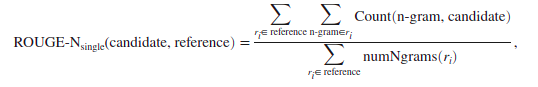

**Longest Common Subsequence (ROUGE-L)**

Given a sentence d=[w
1
,…,w
m
] and a sentence s, where the elements si correspond to words, the subsequence [w
i
1
,…,w
i
k
] is a common subsequence of d and s if w
i
′
j
∈{s
1
,…,s
n
} for j=1,…,k and i
1
​<⋯<i
k
, where the elements of s are the words of the sentence and k is the length of the subsequence. The subsequence [w
i
1
,…,w
i
k
] is a longest common subsequence (LCS) if the subsequence length k is maximal.

Given a candidate document and a single reference document the union of the longest common subsequences is given by


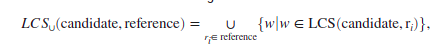


where LCS(candidate,r
i
) is the set of longest common subsequences in the candidate document and the sentence ri from a reference document.

The ROUGE-L metric is an F-score measure. To calculate it, first calculate the recall and precision scores given by


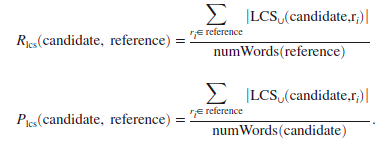

Then, the ROUGE-L metric between a candidate document and a single reference document is given by the F-score measure

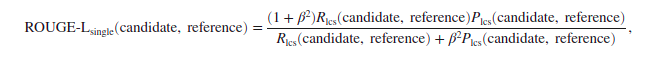

where the parameter β controls the relative importance of the precision and recall. Because the ROUGE score favors recall, β is typically set to a high value.

For sets of multiple reference documents, the ROUGE-L metric is given by

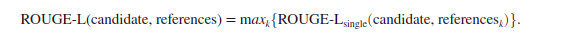


# References:

* https://huggingface.co/transformers/model_doc/bart.html
* https://www.pytorchlightning.ai/
* https://www.frase.io/blog/20-applications-of-automatic-summarization-in-the-enterprise/
* https://medium.com/sciforce/towards-automatic-summarization-part-2-abstractive-methods-c424386a65ea
* https://medium.com/swlh/a-simple-overview-of-rnn-lstm-and-attention-mechanism-9e844763d07b
* https://github.com/CurationCorp/curation-corpus